Fresh Graduate Academy Digital Talent Scholarship Alur Belajar Machine Learning Developer
*   Nama : Abdurrahman Aziz 
*   Noreg : 1494037162101-1811


Pada proyek belajar machine learning ini menggunakan dataset IMDB 50k movie reviews dari kaggle. Untuk mendownload dataset tersebut dapat menggunakan kaggle API. Dari train dataset diambil 10000 sample berupa 5000 sample review positif dan 5000 sample review negatif untuk dilakukan training dan validating. Preprocessing yang dilakukan yaitu dengan menghilangkan tanda baca dan angka, menghilangkan stopword menggunakan library nltk, dan melakukan lemmatization menggunakan library spacy. Model yang digunakan menggunakan Bidirectional LSTM yang menghasilkan akurasi diatas 90% dan validation accuracy diatas 85%


# Import Library

In [ ]:
from google.colab import files

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import re # regular expression
import spacy # 
import nltk # natural language toolkit
from string import punctuation
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences

In [ ]:
from sklearn.model_selection import train_test_split

# Load Dataset from Kaggle

In [ ]:
#upload kaggle.json or dataset file

files.upload()

In [ ]:
#create directory for kaggle.json & change access for kaggle.json if using kaggle API

# !mkdir ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#Download dataset from kaggle

# !kaggle datasets download -d atulanandjha/imdb-50k-movie-reviews-test-your-bert

In [ ]:
# !unzip '/content/imdb-50k-movie-reviews-test-your-bert.zip'

# Read Dataset

In [ ]:
df = pd.read_csv('/content/train.csv')
df

,text,sentiment
0,"Now, I won't deny that when I purchased this o...",neg
1,"The saddest thing about this ""tribute"" is that...",neg
2,Last night I decided to watch the prequel or s...,neg
3,I have to admit that i liked the first half of...,neg
4,I was not impressed about this film especially...,neg
...,...,...
24995,"This film is fun, if your a person who likes a...",pos
24996,After seeing this film I feel like I know just...,pos
24997,first this deserves about 5 stars due to actin...,neg
24998,If you like films that ramble with little plot...,neg


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       25000 non-null  object
 1   sentiment  25000 non-null  object
dtypes: object(2)
memory usage: 390.8+ KB


In [ ]:
len(df[df['sentiment'] == 'neg'])

12500

In [ ]:
neg_df = df[df['sentiment'] == 'neg']
neg_df

,text,sentiment
0,"Now, I won't deny that when I purchased this o...",neg
1,"The saddest thing about this ""tribute"" is that...",neg
2,Last night I decided to watch the prequel or s...,neg
3,I have to admit that i liked the first half of...,neg
4,I was not impressed about this film especially...,neg
...,...,...
24991,Dynasty Revisited in Hawaii... Full of clichés...,neg
24994,"""The Bubble"" is an effort to make a gay Romeo ...",neg
24997,first this deserves about 5 stars due to actin...,neg
24998,If you like films that ramble with little plot...,neg


In [ ]:
pos_df = df[df['sentiment'] == 'pos']
pos_df

,text,sentiment
5,"The original movie, The Odd Couple, has some w...",pos
6,"This was a great movie with a good cast, all o...",pos
8,"Fast-paced, funny, sexy, and spectacular. Cagn...",pos
16,A movie of outstanding brilliance and a poigna...,pos
19,It appears even the director doesn't like this...,pos
...,...,...
24990,Spirit: Stallion of the Cimarron is an overall...,pos
24992,I've read a number of reviews on this film and...,pos
24993,"'Where the Sidewalk Ends (1950)' opens, approp...",pos
24995,"This film is fun, if your a person who likes a...",pos


# Mengambil Sample

In [ ]:
sample_pos_df = pos_df.head(5000)
sample_neg_df = neg_df.head(5000)

# Preprocessing

In [ ]:
sample_df = pd.concat([sample_pos_df, sample_neg_df])
sample_df.index = range(len(sample_df))
sample_df

,text,sentiment
0,"The original movie, The Odd Couple, has some w...",pos
1,"This was a great movie with a good cast, all o...",pos
2,"Fast-paced, funny, sexy, and spectacular. Cagn...",pos
3,A movie of outstanding brilliance and a poigna...,pos
4,It appears even the director doesn't like this...,pos
...,...,...
9995,There's not much to say about this one. Gammer...,neg
9996,You can never have seen either film and still ...,neg
9997,"What a long, drawn-out, pointless movie. I'm s...",neg
9998,We loved School of Rock and Jack Black. We cou...,neg


In [ ]:
category = pd.get_dummies(sample_df.sentiment)
new_df = pd.concat([sample_df, category], axis=1)
new_df = new_df.drop(columns='sentiment')
new_df

,text,neg,pos
0,"The original movie, The Odd Couple, has some w...",0,1
1,"This was a great movie with a good cast, all o...",0,1
2,"Fast-paced, funny, sexy, and spectacular. Cagn...",0,1
3,A movie of outstanding brilliance and a poigna...,0,1
4,It appears even the director doesn't like this...,0,1
...,...,...,...
9995,There's not much to say about this one. Gammer...,1,0
9996,You can never have seen either film and still ...,1,0
9997,"What a long, drawn-out, pointless movie. I'm s...",1,0
9998,We loved School of Rock and Jack Black. We cou...,1,0


In [ ]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
def remove_punctuations(text):
    no_punct = []
    punctuations = punctuation + '`"__--'
    text = text.lower()
    # text = re.sub('@\S+ | #\S+', '', text).strip()

    for words in text.lower():
        if words not in punctuations:
          no_punct.append(words)
        else:
          no_punct.append(' ')

    words_wo_punct = ''.join(no_punct)
    words_wo_punct = [i.strip() for i in words_wo_punct.split()]
    words_wo_punct = ' '.join(words_wo_punct)
    return words_wo_punct

In [ ]:
def remove_stopwords(text):
    final_text = []
    stop_corpus_en = stopwords.words('english')

    stop = stop_corpus_en
    stop = set(stop)

    for i in text.split():
        if i.strip().lower() not in stop:
            final_text.append(i.strip())
    return ' '.join(final_text)

In [ ]:
SPC = spacy.load('en_core_web_sm')
def lemmatizee(text, spc=SPC):

    lemma = [words.lemma_ for words in spc(text)]
    words_lemma = ' '.join(lemma)
    return words_lemma

In [ ]:
def denoise_text(text):
    text = remove_punctuations(text)
    text = re.sub('\d', '', text).lower() #remove number
    text = remove_stopwords(text)
    text = lemmatizee(text)
    return text

In [ ]:
new_df['text'] = new_df['text'].apply(denoise_text)

In [ ]:
new_df.head(10)

,text,neg,pos
0,original movie odd couple wonderful comic one ...,0,1
1,great movie good cast hit cylinder dianne keat...,0,1
2,fast pace funny sexy spectacular cagney always...,0,1
3,movie outstanding brilliance poignant unusual ...,0,1
4,appear even director like film think bit harsh...,0,1
5,although see mini series twenty year still rem...,0,1
6,program lot fun title song catchy get head fin...,0,1
7,excellent movie realistic picture contemporary...,0,1
8,kenneth branagh show excellent skill act write...,0,1
9,watch record year back local tv underwhelme su...,0,1


In [ ]:
new_df.to_csv('new_df.csv')

# Modelling

In [ ]:
review = new_df['text'].values
label = new_df[['pos','neg']].values

In [ ]:
review_train, review_test, label_train, label_test = train_test_split(review, label, test_size=0.2)

In [ ]:
tokenizer = Tokenizer(num_words=10000, 
                      oov_token='x', 
                      lower=True, 
                      filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n')
tokenizer.fit_on_texts(review_train) 
tokenizer.fit_on_texts(review_test)
 
sequence_train = tokenizer.texts_to_sequences(review_train)
sequence_test = tokenizer.texts_to_sequences(review_test)
 
padded_train = tf.keras.utils.pad_sequences(sequence_train, 
                                            padding='post', truncating='post') 
padded_test = tf.keras.utils.pad_sequences(sequence_test, 
                                           padding='post', truncating='post')

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=10000, output_dim=128),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 128)         1280000   
                                                                 
 bidirectional (Bidirectiona  (None, 128)              98816     
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                        

In [ ]:
class custom_callbacks(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs = None):
        if logs.get('accuracy') >= 85e-2 and logs.get('val_accuracy') >= 85e-2:
            print('\nFor Epoch', epoch, '\nAccuracy has reach = %2.2f%%' %(logs['accuracy']*100), 
                  'and Validation Accuracy has reach = %2.2f%%' %(logs['val_accuracy']*100), 'training has been stopped.')
            self.model.stop_training = True

In [ ]:
num_epochs = 10
history = model.fit(padded_train, label_train, epochs=num_epochs, 
                    validation_data=(padded_test, label_test), 
                    verbose=2, callbacks=[custom_callbacks()])

Epoch 1/10
250/250 - 182s - loss: 0.4989 - accuracy: 0.7508 - val_loss: 0.4206 - val_accuracy: 0.8210 - 182s/epoch - 729ms/step
Epoch 2/10
250/250 - 180s - loss: 0.2421 - accuracy: 0.9134 - val_loss: 0.3854 - val_accuracy: 0.8365 - 180s/epoch - 718ms/step
Epoch 3/10

For Epoch 2 
Accuracy has reach = 95.44% and Validation Accuracy has reach = 85.25% training has been stopped.
250/250 - 182s - loss: 0.1388 - accuracy: 0.9544 - val_loss: 0.3846 - val_accuracy: 0.8525 - 182s/epoch - 729ms/step


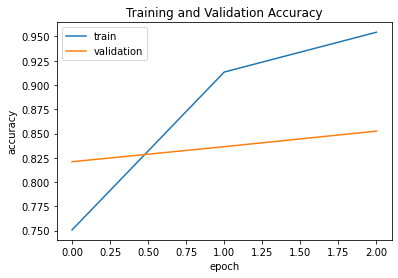

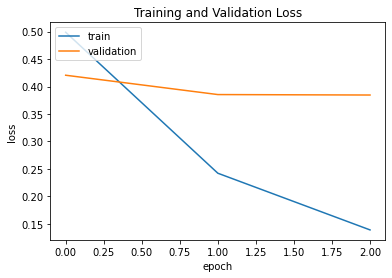

In [ ]:
# Summarize history for accuracy & loss
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.title('Training and Validation Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Training and Validation Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()